# Compte rendu MP3: Calcul des forces de pression sur une digue

Notre objectif sera de calculer numériquement les forces s'appliquant à une digue de forme arbitraire. 

Les forces s'appliquant sur la digue sont: 

- Poids de la digue $\vec{P_{digue}} = - P_{digue} \cdot \vec{e_{y}} = -m_{digue} g \cdot \vec{e_{y}}$
- Force de pression de l'eau sur la digue $\vec{F_{p}}= -( F_{p_{x}} \cdot \vec{e_{x}} + F_{p_{y}}\vec{e_{y}}) $   
- Réaction tangente $\vec{T} = T \cdot \vec{e_{x}}$ (force de frottement)
- Réaction normale $\vec{N}= N \cdot \vec{e_{y}}$
 
La force qui empéche à la digue de glisser c'est la force de frottement de la force de réaction du sol par le contact avec la digue.  

La digue sera à l'équilibre si:

Condition d'équilibre sur le frottement: $$T\leq \mu N  \rightarrow  \mu \geq \frac{T}{N}$$

En appliquant la 1ère Loi de Newton, $$\sum \vec{F_{ext}} = 0  \rightarrow  \vec{P_{digue}}+\vec{F_{p}}+\vec{T}+\vec{N}=0$$  

Si on projette sur les axes on a: 

$$
\begin{cases}
F_{p_x}=\int_0^H P(y)\mathrm{d}y \\
F_{p_y}=\int_0^H P(y) \tan(\theta) \mathrm{d}y = \int_0^H P(y) f'(y) \mathrm{d}y
\end{cases}
$$  

Avec la loi fondamentalle de l'hydrostatique: $P(y)-P_{0}=\rho g (H-y) \rightarrow P(y)=\rho \cdot g (H-y)$   
*(En fixant le 0 en H)*

Soit en forme différentielle:  

**Cas des pentes droites**
$$
\begin{cases}
\vec{dF_{p_x}}= -\rho g (H-y) \mathrm{d}y\\
\vec{dF_{p_y}}= \rho g x_{e}\cdot (1-\frac{y}{H})  \mathrm{d}y 
\end{cases}
$$

Avec:  $f'(y)=\frac{-x_{e}}{H}$ 

**Cas des pentes convexes**




#### Données: 

Masse volumique du beton $\rho_{digue}=3000  Kg/m^{3}$  
Coeff de friction statique béton - roche $\mu=0.5$  
Hauteur de la masse d'eau contenue $H=10 m$ 

#### Hypothèses: 

- Situation à 2D
- Force de pression de l'air sur la digue négligéables, pression de l'eau la seule à considérer 

#### Schéma du problème

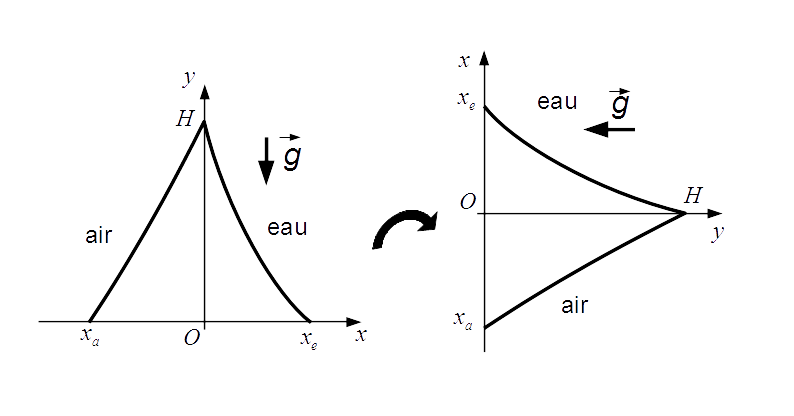

In [1]:
# Import des modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Création d'une classe pour contenir les variables
class constantes:
    def __init__(self):
        self.rho = 3000 # Kg/m**3
        self.g   = 9.8  # m/s**2 
        self.rho_eau = 1000 # Kg/m**3
        self.mu = 0.5
        self.H = 10 # en m
        self.a = 3

cte = constantes()

#### Fonctions:

In [3]:
# Intégrale par la méthode des rectangles
def integrale(y,a,b,pas):
    """integral, coge la funcion a integrar, los intervalos deintegracion y los pasos"""
    volume  = 0
    delta_x = abs(b-a)/pas
    for i in range(pas-1):
        aire  = y[i+1]*delta_x
        volume += aire
    return volume

In [4]:
def derivee(x, y):
    """Calcule la fonction derivée par rapport au point à droite"""
    derivee_ = np.zeros(len(x))
    for i in range(len(x)-1):
        derivee_[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
    
    # Pour le dernier point on calcule la dérivée gauche
    derivee_[-1] = (y[-2] - y[-1]) / (x[-2] - x[-1])
    return derivee_

In [5]:
# Définition de la fonction de pression
def P(y):
    """Fonction de la pression"""
    return(cte.rho_eau * cte.g * (cte.H-y))

## Cas des digues en pentes droites

#### Expression des courbes côté air et côté eau: 

Avec y en abscises:

$$
\begin{cases}
x_{air}(y) = x_a \cdot (1-\frac{y}{H}) \\  x_{eau}(y) = x_{e} \cdot (1-\frac{y}{H})
\end{cases}
$$   

In [6]:
# Fonctions côté air et eau y en abscises
def xeau(y):
    """xeau avec y en abscises"""
    return xe*(1-(y/cte.H))
def xair(y):
    """xair avec y en abscises"""
    return xa*(1-(y/cte.H))

#### Affichage de la digue

Schéma du problème:

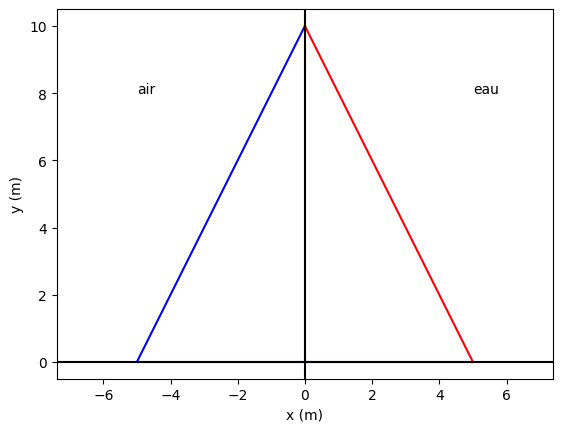

In [7]:
# Ce code permet d'afficher les courbes représentant la digue
H = 10
xa = -5
xe = +5

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(xair(y), y, '-b') 
plt.plot(xeau(y), y, '-r')  ## Décommenter après avoir codé la fonction feau(x)
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

#### Calcul du volume et poids de la digue en fonction de y

**Calcul numérique**

In [8]:
# On définit les bornes et pas d'intégration
xa=-5; xe=+5; pas = 2000
j=0

y_air = np.linspace(j,cte.H,pas)
y_eau = np.linspace(j,cte.H,pas)
x_air = xair(y_air)
x_eau = xeau(y_air)

In [9]:

# Calcul du volume, masse et poids
v_digue = ((integrale(x_eau,j,cte.H,pas) - integrale(x_air,j,cte.H,pas))) * 1 # m**3
m_digue = cte.rho * v_digue * 1 # en Kg
P_digue = m_digue * cte.g

# Poids en forme vectorielle
P_digue_vect = -P_digue

In [10]:
# Plot du volume, masse et poids
print("Volume de la digue:{:.0f} m**2".format(v_digue))
print("Masse de la digue:",m_digue,"kg")
print("Poids de la digue: {:.0f} N".format(P_digue))

Volume de la digue:50 m**2
Masse de la digue: 149850.0 kg
Poids de la digue: 1468530 N


**Calcul analytique**

On obtient les mêmes résultats par un calcul analytique de la formule:

$$
V=\iiint_V dx dy dz = \int_{0}^{1} \int_{0}^{x_{e}} \int_{0}^{H(1-\frac{x}{x_{e}})} dy dx dz 
$$

#### Calcul de la résultante des forces de pression (côté eau)

Avec: 
$$\vec{F_{p_x}}=-\int_{0}^{H} \rho_{eau} g (H-y) \mathrm{d}y \cdot \vec{e_{x}}$$
$$\vec{F_{p_y}}=-\int_{0}^{H} \rho_{eau} g x_{e}\cdot (1-\frac{y}{H})  \mathrm{d}y \cdot \vec{e_{y}}$$

In [11]:
# Calcul de la dérivée côté eau
def dFy(y):
    """Élément de force de pression selon y cas affine"""
    return -(cte.rho_eau * cte.g * xe * (1-y/cte.H))
def dFx(y):
    """Élément de force de pression selon x cas affine"""
    return (cte.rho_eau * cte.g * (cte.H-y))

In [12]:
# Calcul des forces de pression
F_y = integrale(dFy(y_eau),0,cte.H,pas)
F_x = integrale(dFx(y_eau),0,cte.H,pas)
F_x_vect = -F_x
F_y_vect = F_y

In [13]:
# Plot des forces de pression
print(f"Normes des forces de pression:\nFpx:{F_x:.2e}\nFpy:{F_y:.2e}\n")
print("Forces de pression sous forme vectorielle:\nFpx:{:.2e}\nFpy:{:.2e}".format(F_x_vect,F_y_vect))

Normes des forces de pression:
Fpx:4.90e+05
Fpy:-2.45e+05

Forces de pression sous forme vectorielle:
Fpx:-4.90e+05
Fpy:-2.45e+05


#### PFD de la réaction T et N et rapport T/N, équilibre de la digue

En appliquant le PFD:  
$$
\begin{cases}
T=-\vec{F_{p_{x}}} \\  N=-\vec{F_{p_{y}}}-\vec{P_{digue}}
\end{cases}
$$

In [14]:
# Composantes de la réaction du sol
T_vect = -F_x_vect
N_vect = -F_y_vect-P_digue_vect

print(f"Réaction tangentielle:{T_vect:.2e}N",f"Réaction normale:{N_vect:.2e}N",sep="\n")

Réaction tangentielle:4.90e+05N
Réaction normale:1.71e+06N


Équilibre de la digue:  

Il y équilibre si  $$\mu \geq \frac{T}{N}$$

In [15]:
# Calcul du rapport T/N
rapport_TN = abs(T_vect/N_vect)
print(f"Rapport T/N:{rapport_TN}")
print("Est-ce qu'elle atteint la condition d'équilibre translattionnel?:",cte.mu>=abs(T_vect/N_vect))

Rapport T/N:0.2857142857142857
Est-ce qu'elle atteint la condition d'équilibre translattionnel?: True


#### Fonction résumé des calculs

In [34]:
def calcul (xa,xe,pas, lineal = True, calculate = False):
    """Calcul du volume, poids, forces de pression et rapport T/N"""
    
    # Plages de données
    y_air = np.linspace(cte.H,0,pas)
    y_eau = np.linspace(cte.H,0,pas)
    if lineal == False:
        x_air = fair(y_air)
        x_eau = feau(y_air)
    else:
        x_air = xair(y_air)
        x_eau = xeau(y_air)
    
    #QUESTION 1
    
    # Calcul du volume, masse et poids
    v_digue = ((integrale(x_eau,0,cte.H,pas) - integrale(x_air,0,cte.H,pas))) * 1 # m**3
    m_digue = cte.rho * v_digue * 1 # en Kg
    P_digue = m_digue * cte.g

    # Poids en forme vectorielle
    P_digue_vect = -P_digue

 
    
    # QUESTION 2
    
    # Calcul des forces de pression
    if lineal == False:
        F_y = integrale(P(y_eau) * feau_prime(y_eau), 0, cte.H, pas)  
        F_x = integrale(P(y_eau), 0, cte.H, pas)
    else:
        F_y = integrale(dFy(y_eau),0,cte.H,pas)
        F_x = integrale(dFx(y_eau),0,cte.H,pas)
        
    F_x_vect = -F_x
    F_y_vect = F_y
    
    
    #QUESTION 3
    
    # Composantes de la réaction du sol
    T_vect = -F_x_vect
    N_vect = -F_y_vect-P_digue_vect
    
    
    # Calcul du rapport T/N
    rapport_TN = abs(T_vect/N_vect)
    
    
    if calculate == True:
        return [v_digue, rapport_TN]
    else:
        # Print du volume, masse et poids
        print("Volume de la digue:{:.0f} m**2".format(v_digue))
        print("Masse de la digue:{} kg".format(m_digue))
        print("Force de gravité sur la digue: {:.0f} N".format(P_digue))
        # Plot des forces de pression
        print(f"Normes des forces de pression:\nFpx:{F_x:.2e}\nFpy:{F_y:.2e}\n")
        print("Forces de pression sous forme vectorielle:\nFpx:{:.2e}\nFpy:{:.2e}".format(F_x_vect,F_y_vect))
        # Composantes de la réaction
        print(f"Réaction tangentielle:{T_vect:.2e}N",f"Réaction normale:{N_vect:.2e}N",sep="\n")
        # Rapport T/N
        print(f"Rapport T/N:{round(rapport_TN,2)}")
        print("Est-ce qu'elle atteint la condition d'équilibre translationnel?:",cte.mu>=round(rapport_TN,2))

#### Calcul avec nouvelles CI

In [31]:
xa = -5; xe = 0; pas = 2000
calcul(xa,xe,pas)

Volume de la digue:25 m**2
Masse de la digue:75000.0 kg
Force de gravité sur la digue: 735000 N
Normes des forces de pression:
Fpx:4.90e+05
Fpy:0.00e+00

Forces de pression sous forme vectorielle:
Fpx:-4.90e+05
Fpy:0.00e+00
Réaction tangentielle:4.90e+05N
Réaction normale:7.35e+05N
Rapport T/N:0.67
Est-ce qu'elle atteint la condition d'équilibre translationnel?: False


In [32]:
xa = 0; xe = 5; pas = 1000
calcul(xa,xe,pas)

Volume de la digue:25 m**2
Masse de la digue:75000.0 kg
Force de gravité sur la digue: 735000 N
Normes des forces de pression:
Fpx:4.90e+05
Fpy:-2.45e+05

Forces de pression sous forme vectorielle:
Fpx:-4.90e+05
Fpy:-2.45e+05
Réaction tangentielle:4.90e+05N
Réaction normale:9.80e+05N
Rapport T/N:0.5
Est-ce qu'elle atteint la condition d'équilibre translationnel?: True


On constate que dans ce cas la digue est à la limite de l'équilibre au contraire que la digue précedente, même quand les deux ont même volume et masse. Cela vient du fait que dans ce cas il y a une force de pression selon y, celle-ci implique l'augmentation de la norme de la réaction normale au sol ce qui implique un plus grand frottement du béton avec le sol et une opposition plus grande au glissement.

## Cas des digues convexes

L'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction de la forme :
$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$

Également la dérivée est:

$$
f'_{eau}(y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$

Avec $a=3$.

#### Fonctions

In [23]:
def feau(y):
    return cte.a * (y / cte.H) ** 2 - (cte.a + xe) * (y / cte.H) + xe

def feau_prime(y):
    return (2*cte.a*y)/(cte.H**2)-(cte.a+xe)/cte.H

def fair(y):
    return (cte.H - y) * xa / cte.H

#### Affichage de la digue

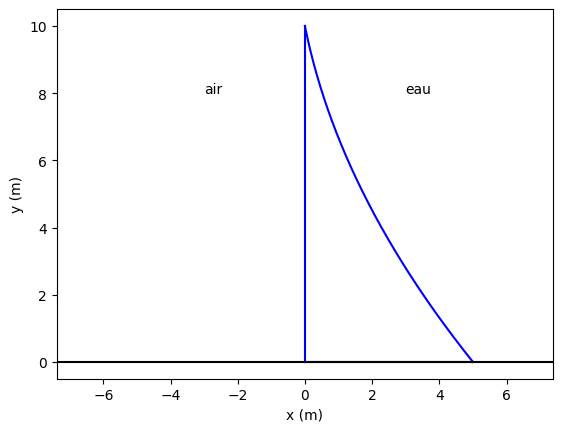

In [24]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xe = 5
xa = 0

# On définit les fonctions côté eau et côté air, ici les courbes concaves
# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(feau(y), y, '-b')
plt.plot(fair(y), y, '-b')
plt.plot([xe, xa], [0, 0], '-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3, 8, 'eau')
plt.text(-3, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
#plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

#### Résultante des forces de pression, volume du béton et rapport T/N (équilibre statique)

In [25]:
xa = 0; xe = 5; pas = 1000
calcul(xa, xe, pas, False)

Volume de la digue:20 m**2
Masse de la digue:60015.015015015 kg
Force de gravité sur la digue: 588147 N
Normes des forces de pression:
Fpx:4.90e+05
Fpy:-2.94e+05

Forces de pression sous forme vectorielle:
Fpx:-4.90e+05
Fpy:-2.94e+05
Réaction tangentielle:4.90e+05N
Réaction normale:8.82e+05N
Rapport T/N:0.56
Est-ce qu'elle atteint la condition d'équilibre translationnel?: False


#### Cas xe = 6 et comparation avec la pente affine

In [26]:
xa = 0; xe = 6; pas = 2000
calcul(xa, xe,pas, False)

Volume de la digue:25 m**2
Masse de la digue:75007.5037518758 kg
Force de gravité sur la digue: 735074 N
Normes des forces de pression:
Fpx:4.90e+05
Fpy:-3.43e+05

Forces de pression sous forme vectorielle:
Fpx:-4.90e+05
Fpy:-3.43e+05
Réaction tangentielle:4.90e+05N
Réaction normale:1.08e+06N
Rapport T/N:0.45
Est-ce qu'elle atteint la condition d'équilibre translationnel?: True


Si on compare avec le cas de la pente affine pour $x_{a}=0$ et $x_{e}=5$ afin de déterminer lequel est le cas le plus favorable on devrait comparer le rapport $T/N$ de chacun de cas. Celui avec le rapport le plus grand sera le plus proche à la perte de l'équilibre ou, dans d'autres mots, le moins stable des deux. On donc:

$$(\frac{T}{N})_{affine} = 0.5 \leq 0.4 = (\frac{T}{N})_{convexe}$$  

La digue de pente convexe est la plus stable.

#### $T/N$ en fonction du volume

In [37]:
xe_list = np.linspace(5,6,20)
volume  = np.ones(xe_list.size)
T_N     = np.ones(xe_list.size)

for i in range(xe_list.size):
    xe = xe_list[i]
    data = calcul(0,xe,2000,False,True)
    volume[i] = data[0]
    T_N[i]    = data[1]

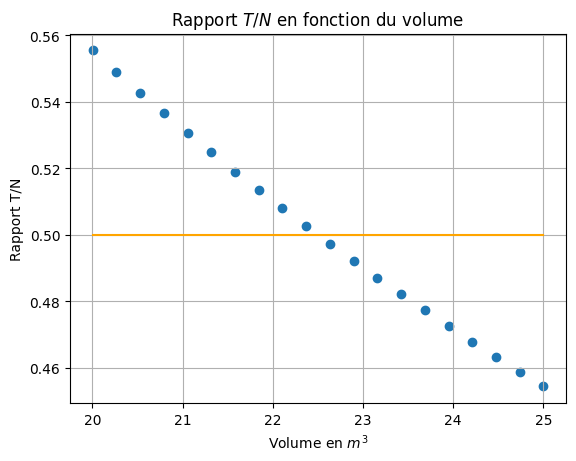

In [38]:
# Rapport maximal pour l'équilibre
T_N_lim = 0.5

#Plot
plt.scatter(volume,T_N, label="T/N")
plt.plot(volume,0.5*np.ones(volume.size), color = "orange")
plt.title("Rapport $T/N$ en fonction du volume")
plt.xlabel("Volume en $m^3$");plt.ylabel("Rapport T/N")
plt.grid()
plt.show()

On remaruqe visuellement que le volume minimal pour garder la digue en équilibre est d'approximativement $22.5 m^{3}$ 

On voit par rappoer au cas affine que la forme courbe aide à réduire le volume nécéssaire pour maintenir la digue en équilibre du à une meilleure distribution de forces. La surface courbe augmente la proportion de force de pression dirirgées vers le bas augmentant de cette manière la réaction normalle et la force frottement de la digue (et donc sa résistence au glissement).